### DMA course project review 2

#### Preprocessing of data

   1. - Team ID             - 5A09
      - Sem                 - 5TH 
      - Div                 - 'A'
      - School              - KLE Technological university
   
   
   2. - Topic ID            - 5ADMACP14
      - Project Title       - Sina Weibo Intereaction Prediction
   
   
   3. Problem Statement     - To predict the user behaviors such as forwarding, commenting and liking.
   
   
   4. - Team Leader         - Deepti Nadkarni         - 01FE16BCS062 (Roll no-58)
      - Members   
         - Apoorva Malemath     - 01FE16BCS041 (Roll no-39)
         - Arundati Dixit       - 01FE16BCS046 (Roll no-44)
         - Ashish Kar           - 01FE16BCS047 (Roll no-45) 
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%pylab inline
import copy
from googletrans import Translator
import pandas as pd
import numpy as np
import csv
import re
import jieba
import time
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.externals import joblib
from nltk.corpus import stopwords as e_stopwords
from datetime import datetime, timedelta
import jieba
import sys

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

Populating the interactive namespace from numpy and matplotlib


### DATA PREPROCESSING
- Raw data is not directly adequate for analysis.
- Training data
  - uid
  - mid
  - time
  - forward_count
  - comment_count
  - like_count
  - content
- Predicting data
  - uid
  - mid
  - time
  - content
- Previous Observations made
  - Training data has 12,296,18 tuples.
  - Predicting data has 43,845 tuples.
  - Significant occurance of the value zero.
- Translation
  


In [3]:
train1= pd.read_csv("E:\\5th Sem\\DMA Project\\DMA Project Sina Weibo\\CSV\\weibo_train1.csv")

In [3]:
train2= pd.read_csv("E:\\5th Sem\\DMA Project\\DMA Project Sina Weibo\\CSV\\weibo_train2.csv")

In [4]:
frames=[train1,train2]
train=pd.concat(frames)

In [5]:
train.shape

(1229618, 11)

In [6]:
train.head(5)

,u_id,m_id,forward_count,comment_count,like_count,content,date,time,content_media_count,content_spchar,non_emoji_content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2015-02-23,17:41:29,0.0,['(' ')' '#' '#' '#' '#' '#' '#' '#' ...,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...,2015-02-14,12:49:58,1.0,['#' '#' '，' '。' '@' '，' '！' '，' '╮' ...,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,0,0,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了,2015-03-31,13:58:06,0.0,['。' '。' '。' '~' '，'],淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,0,4,3,看点不能说的，你们都懂[笑cry],2015-06-11,20:39:57,0.0,['，' '[' ']'],看点不能说的，你们都懂[笑cry]
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,0,0,0,111多张,2015-03-10,18:02:38,0.0,[],111多张


In [5]:
tc=np.array_split(train,400)

In [7]:
i=0
for i in range(400):
    ith=str(i)
    f="G:\\concatfiles\\f"+ith+".txt"
    tc[i].to_csv(f,sep=',',index=False,encoding='utf-8')

### Translation 
- u_id 
- m_id 
- forward_count
- comment_count
- like_count
- content
- date
- time
- content_media_count
- content_spchar
- non_emoji_content 
- en_content


In [8]:

translated=pd.DataFrame(columns=list(['u_id', 'm_id', 'forward_count', 'comment_count', 'like_count',
       'content', 'date', 'time', 'content_media_count', 'content_spchar',
       'non_emoji_content', 'en_content', 'Unnamed: 1']))


Translation has been performed on the content column seperately by considering it as a seperate file, thus the files are concatinaated

In [9]:
for j in range(0,218):
    filename="G:\\concatfiles\\f"+str(j)+".txt"
    transname="G:\\translated\\ts"+str(j)+".zh-CN.en.txt"
    print(filename)
    print(transname)
    f=pd.read_csv(filename)
    t= pd.read_csv(transname,sep="5A09")
    frames = [f,t]
#result = pd.concat(frames, ignore_index=False)
    #df="df"+str(j)
    df=(pd.concat(frames, join='outer', ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False, copy=True, axis=1))
    translated=translated.append(df)
    #translated.append(df,ignore_index=True)

G:\concatfiles\f0.txt
G:\translated\ts0.zh-CN.en.txt
G:\concatfiles\f1.txt
G:\translated\ts1.zh-CN.en.txt


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


G:\concatfiles\f2.txt
G:\translated\ts2.zh-CN.en.txt
G:\concatfiles\f3.txt
G:\translated\ts3.zh-CN.en.txt
G:\concatfiles\f4.txt
G:\translated\ts4.zh-CN.en.txt
G:\concatfiles\f5.txt
G:\translated\ts5.zh-CN.en.txt
G:\concatfiles\f6.txt
G:\translated\ts6.zh-CN.en.txt
G:\concatfiles\f7.txt
G:\translated\ts7.zh-CN.en.txt
G:\concatfiles\f8.txt
G:\translated\ts8.zh-CN.en.txt
G:\concatfiles\f9.txt
G:\translated\ts9.zh-CN.en.txt
G:\concatfiles\f10.txt
G:\translated\ts10.zh-CN.en.txt
G:\concatfiles\f11.txt
G:\translated\ts11.zh-CN.en.txt
G:\concatfiles\f12.txt
G:\translated\ts12.zh-CN.en.txt
G:\concatfiles\f13.txt
G:\translated\ts13.zh-CN.en.txt
G:\concatfiles\f14.txt
G:\translated\ts14.zh-CN.en.txt
G:\concatfiles\f15.txt
G:\translated\ts15.zh-CN.en.txt
G:\concatfiles\f16.txt
G:\translated\ts16.zh-CN.en.txt
G:\concatfiles\f17.txt
G:\translated\ts17.zh-CN.en.txt
G:\concatfiles\f18.txt
G:\translated\ts18.zh-CN.en.txt
G:\concatfiles\f19.txt
G:\translated\ts19.zh-CN.en.txt
G:\concatfiles\f20.txt
G:\

G:\concatfiles\f150.txt
G:\translated\ts150.zh-CN.en.txt
G:\concatfiles\f151.txt
G:\translated\ts151.zh-CN.en.txt
G:\concatfiles\f152.txt
G:\translated\ts152.zh-CN.en.txt
G:\concatfiles\f153.txt
G:\translated\ts153.zh-CN.en.txt
G:\concatfiles\f154.txt
G:\translated\ts154.zh-CN.en.txt
G:\concatfiles\f155.txt
G:\translated\ts155.zh-CN.en.txt
G:\concatfiles\f156.txt
G:\translated\ts156.zh-CN.en.txt
G:\concatfiles\f157.txt
G:\translated\ts157.zh-CN.en.txt
G:\concatfiles\f158.txt
G:\translated\ts158.zh-CN.en.txt
G:\concatfiles\f159.txt
G:\translated\ts159.zh-CN.en.txt
G:\concatfiles\f160.txt
G:\translated\ts160.zh-CN.en.txt
G:\concatfiles\f161.txt
G:\translated\ts161.zh-CN.en.txt
G:\concatfiles\f162.txt
G:\translated\ts162.zh-CN.en.txt
G:\concatfiles\f163.txt
G:\translated\ts163.zh-CN.en.txt
G:\concatfiles\f164.txt
G:\translated\ts164.zh-CN.en.txt
G:\concatfiles\f165.txt
G:\translated\ts165.zh-CN.en.txt
G:\concatfiles\f166.txt
G:\translated\ts166.zh-CN.en.txt
G:\concatfiles\f167.txt
G:\tran

In [11]:
translated1=pd.DataFrame()
for j in range(219,339):
    filename="G:\\concatfiles\\f"+str(j)+".txt"
    transname="G:\\translated\\ts"+str(j)+".zh-CN.en.txt"
    print(filename)
    print(transname)
    f=pd.read_csv(filename)
    t= pd.read_csv(transname,sep="5A09")
    frames = [f,t]
#result = pd.concat(frames, ignore_index=False)
    #df="df"+str(j)
    df=(pd.concat(frames, join='outer', ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False, copy=True, axis=1))
    translated1=translated1.append(df)
    #translated.append(df,ignore_index=True)

G:\concatfiles\f219.txt
G:\translated\ts219.zh-CN.en.txt
G:\concatfiles\f220.txt
G:\translated\ts220.zh-CN.en.txt


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


G:\concatfiles\f221.txt
G:\translated\ts221.zh-CN.en.txt
G:\concatfiles\f222.txt
G:\translated\ts222.zh-CN.en.txt
G:\concatfiles\f223.txt
G:\translated\ts223.zh-CN.en.txt
G:\concatfiles\f224.txt
G:\translated\ts224.zh-CN.en.txt
G:\concatfiles\f225.txt
G:\translated\ts225.zh-CN.en.txt
G:\concatfiles\f226.txt
G:\translated\ts226.zh-CN.en.txt
G:\concatfiles\f227.txt
G:\translated\ts227.zh-CN.en.txt
G:\concatfiles\f228.txt
G:\translated\ts228.zh-CN.en.txt
G:\concatfiles\f229.txt
G:\translated\ts229.zh-CN.en.txt
G:\concatfiles\f230.txt
G:\translated\ts230.zh-CN.en.txt
G:\concatfiles\f231.txt
G:\translated\ts231.zh-CN.en.txt
G:\concatfiles\f232.txt
G:\translated\ts232.zh-CN.en.txt
G:\concatfiles\f233.txt
G:\translated\ts233.zh-CN.en.txt
G:\concatfiles\f234.txt
G:\translated\ts234.zh-CN.en.txt
G:\concatfiles\f235.txt
G:\translated\ts235.zh-CN.en.txt
G:\concatfiles\f236.txt
G:\translated\ts236.zh-CN.en.txt
G:\concatfiles\f237.txt
G:\translated\ts237.zh-CN.en.txt
G:\concatfiles\f238.txt
G:\tran

In [12]:
translated2=pd.DataFrame()
for j in range(340,400):
    filename="G:\\concatfiles\\f"+str(j)+".txt"
    transname="G:\\translated\\ts"+str(j)+".zh-CN.en.txt"
    print(filename)
    print(transname)
    f=pd.read_csv(filename)
    t= pd.read_csv(transname,sep="5A09")
    frames = [f,t]
#result = pd.concat(frames, ignore_index=False)
    #df="df"+str(j)
    df=(pd.concat(frames, join='outer', ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False, copy=True, axis=1))
    translated2=translated2.append(df)
    #translated.append(df,ignore_index=True)

G:\concatfiles\f340.txt
G:\translated\ts340.zh-CN.en.txt
G:\concatfiles\f341.txt
G:\translated\ts341.zh-CN.en.txt
G:\concatfiles\f342.txt
G:\translated\ts342.zh-CN.en.txt


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


G:\concatfiles\f343.txt
G:\translated\ts343.zh-CN.en.txt
G:\concatfiles\f344.txt
G:\translated\ts344.zh-CN.en.txt
G:\concatfiles\f345.txt
G:\translated\ts345.zh-CN.en.txt
G:\concatfiles\f346.txt
G:\translated\ts346.zh-CN.en.txt
G:\concatfiles\f347.txt
G:\translated\ts347.zh-CN.en.txt
G:\concatfiles\f348.txt
G:\translated\ts348.zh-CN.en.txt
G:\concatfiles\f349.txt
G:\translated\ts349.zh-CN.en.txt
G:\concatfiles\f350.txt
G:\translated\ts350.zh-CN.en.txt
G:\concatfiles\f351.txt
G:\translated\ts351.zh-CN.en.txt
G:\concatfiles\f352.txt
G:\translated\ts352.zh-CN.en.txt
G:\concatfiles\f353.txt
G:\translated\ts353.zh-CN.en.txt
G:\concatfiles\f354.txt
G:\translated\ts354.zh-CN.en.txt
G:\concatfiles\f355.txt
G:\translated\ts355.zh-CN.en.txt
G:\concatfiles\f356.txt
G:\translated\ts356.zh-CN.en.txt
G:\concatfiles\f357.txt
G:\translated\ts357.zh-CN.en.txt
G:\concatfiles\f358.txt
G:\translated\ts358.zh-CN.en.txt
G:\concatfiles\f359.txt
G:\translated\ts359.zh-CN.en.txt
G:\concatfiles\f360.txt
G:\tran

In [15]:
frames=[translated,translated1,translated2]

In [17]:
translated=translated.append(translated1)

In [18]:
translated=translated.append(translated2)

In [20]:
translated.head(611759).to_csv("E://DMA_PRE//Translated1.csv", sep=',',index=False, encoding= 'utf-8')
translated.tail(611758).to_csv("E://DMA_PRE//Translated2.csv", sep=',',index=False, encoding= 'utf-8')

In [10]:
translated.shape

(670177, 13)

## TEXT PREPROCESSING
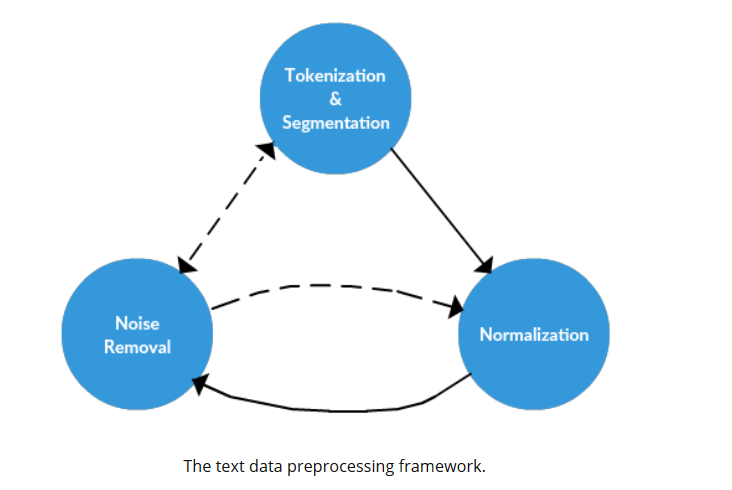

## REMOVAL OF NOISE - URL

In [11]:
def remurl(content):
    try:
        URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', content)
        return URLless_string
    except Exception as e:
        print(str(e))
    

In [13]:
df_urlrem = pd.DataFrame(columns=['en_contenturl','url_rem'])
for i in range(50000):
    non_emo=translated['en_content'].iloc[i]
    content=translated['en_content'].iloc[i]
    new_content=remurl(content)
    
    df_urlrem = df_urlrem.append({'en_contenturl': non_emo,'url_rem':new_content}, ignore_index=True)

expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object


OUTPUT
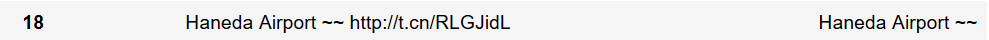

In [22]:
df_urlrem.head(5)

,en_contenturl,url_rem
0,Lijiang Tourism (sz002033) # ## stock stocks F...,Lijiang Tourism (sz002033) # ## stock stocks F...
1,Chen Ling Ding # # red envelopes to make money...,Chen Ling Ding # # red envelopes to make money...
2,Taobao these sucker. . . Industrial gas fire n...,Taobao these sucker. . . Industrial gas fire n...
3,"Aspect can not say, you know everything [laugh...","Aspect can not say, you know everything [laugh..."
4,Over 111 Zhang,Over 111 Zhang


## REMOVAL OF STOPWORDS

In [23]:
remStopword=pd.DataFrame()

In [24]:
def removeStopwords(data):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize(data)
    wordsFiltered = []
    try:
        for w in words:
            if (w not in stop_words) :
                wordsFiltered.append(w)
        return wordsFiltered
    except Exception as e:
        print(str(e))

In [1]:
df_new = pd.DataFrame(columns=['en_contentsw','Stopwrod_removed'])
for i in range(50000):
    non_emo=df_urlrem['url_rem'].iloc[i]
    remStopword=removeStopwords(df_urlrem['url_rem'].iloc[i])
    list1=[non_emo,remStopword]

    df_new = df_new.append({'en_contentsw': non_emo, 'Stopword_removed': remStopword}, ignore_index=True)

OUTPUT


In [114]:
df_new.drop(['Stopwrod_removed'], axis=1).head(5)

,en_contentsw,Stopword_removed
0,Lijiang Tourism (sz002033) # ## stock stocks F...,"[Lijiang, Tourism, (, sz002033, ), #, #, #, st..."
1,Chen Ling Ding # # red envelopes to make money...,"[Chen, Ling, Ding, #, #, red, envelopes, make,..."
2,Taobao these sucker. . . Industrial gas fire n...,"[Taobao, sucker, ., ., ., Industrial, gas, fir..."
3,"Aspect can not say, you know everything [laugh...","[Aspect, say, ,, know, everything, [, laughs, ..."
4,Over 111 Zhang,"[Over, 111, Zhang]"


## STEMMING
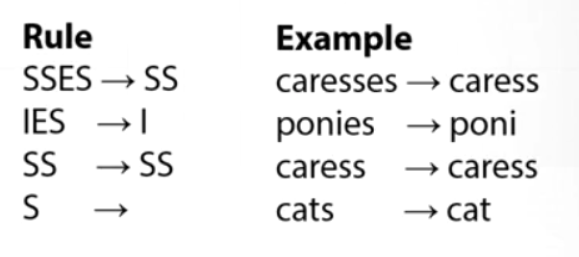

In [96]:
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()


In [97]:
def stemming(tokens):
    # First Word tokenization
    nltk_tokens =tokens 
    stem = []
    #Next find the roots of the word
    try:
        for w in nltk_tokens:
            s=porter_stemmer.stem(w)
            stem.append(s)
        return stem
    except Exception as e:
        print(str(e))

In [32]:
df_stem = pd.DataFrame(columns=['en_contentst','Stemming'])
for i in range(50000):
    content=df_new['Stopword_removed'].iloc[i]
    stem=stemming(df_new['Stopword_removed'].iloc[i])
    list1=[content,stem]
    df_stem = df_stem.append({'en_contentst': content, 'Stemming': stem}, ignore_index=True)

OUTPUT


In [116]:
df_stem.head(5)

,en_contentst,Stemming
0,"[Lijiang, Tourism, (, sz002033, ), #, #, #, st...","[lijiang, tourism, (, sz002033, ), #, #, #, st..."
1,"[Chen, Ling, Ding, #, #, red, envelopes, make,...","[chen, ling, ding, #, #, red, envelop, make, m..."
2,"[Taobao, sucker, ., ., ., Industrial, gas, fir...","[taobao, sucker, ., ., ., industri, ga, fire, ..."
3,"[Aspect, say, ,, know, everything, [, laughs, ...","[aspect, say, ,, know, everyth, [, laugh, cri, ]]"
4,"[Over, 111, Zhang]","[over, 111, zhang]"


## LEMMATIZATION
Returns the base or dictionary form of the word (lemma)
Ex:
- feet --> foot
- wolves --> wolf   


In [34]:
###LEMMATIZATION
import nltk
from nltk.stem import WordNetLemmatizer

In [35]:
def lemmatization(tokens):
    wordnet_lemmatizer = WordNetLemmatizer()
    nltk_tokens =tokens 
    lem = []
    #Next find the roots of the word
    try:
        for w in nltk_tokens:
            l=wordnet_lemmatizer.lemmatize(w)
            lem.append(l)
        return lem
    except Exception as e:
        print(str(e))


In [36]:
df_lem = pd.DataFrame(columns=['Stemmingle','lemmatization'])
for i in range(50000):
    content=df_stem['Stemming'].iloc[i]
    lem=stemming(df_stem['Stemming'].iloc[i])
    list1=[content,lem]
    df_lem = df_lem.append({'Stemmingle': content, 'lemmatization': lem}, ignore_index=True)

In [117]:
df_lem.head(5)

,Stemmingle,lemmatization
0,"[lijiang, tourism, (, sz002033, ), #, #, #, st...","[lijiang, tourism, (, sz002033, ), #, #, #, st..."
1,"[chen, ling, ding, #, #, red, envelop, make, m...","[chen, ling, ding, #, #, red, envelop, make, m..."
2,"[taobao, sucker, ., ., ., industri, ga, fire, ...","[taobao, sucker, ., ., ., industri, ga, fire, ..."
3,"[aspect, say, ,, know, everyth, [, laugh, cri, ]]","[aspect, say, ,, know, everyth, [, laugh, cri, ]]"
4,"[over, 111, zhang]","[over, 111, zhang]"


In [38]:
#nltk.download('wordnet')

## Converting to lower case

In [39]:
def tolower(tokens):
    nltk_tokens=tokens
    x = [element.lower() for element in nltk_tokens] 
    return x


In [40]:
df_lower = pd.DataFrame(columns=['lemmatizationtl','lower'])
for i in range(50000):
    content=df_lem['lemmatization'].iloc[i]
    low=tolower(df_lem['lemmatization'].iloc[i])
    list1=[content,low]
    df_lower = df_lower.append({'lemmatizationtl': content, 'lower': low}, ignore_index=True)

    

OUTPUT


In [118]:
df_lower.head(5)

,lemmatizationtl,lower
0,"[lijiang, tourism, (, sz002033, ), #, #, #, st...","[lijiang, tourism, (, sz002033, ), #, #, #, st..."
1,"[chen, ling, ding, #, #, red, envelop, make, m...","[chen, ling, ding, #, #, red, envelop, make, m..."
2,"[taobao, sucker, ., ., ., industri, ga, fire, ...","[taobao, sucker, ., ., ., industri, ga, fire, ..."
3,"[aspect, say, ,, know, everyth, [, laugh, cri, ]]","[aspect, say, ,, know, everyth, [, laugh, cri, ]]"
4,"[over, 111, zhang]","[over, zhang]"


## Removing numbers

In [42]:
 def rem_num(tokens):
        for item in tokens:
            if item.isdigit():    
                tokens.remove(item)
        return tokens

In [104]:
df_remnum = pd.DataFrame(columns=['lowerrnum','no_num'])
for i in range(50000):
    content=df_lower['lower'].iloc[i]
    nonum=rem_num(df_lower['lower'].iloc[i])
    df_remnum = df_remnum.append({'lowerrnum': content, 'no_num': nonum}, ignore_index=True)

    

## REMOVE PUNTUATION

In [121]:
 def rem_punctuation(tokens):
        input_text = ' '.join(tokens).lower()
        s = re.sub(r"[-()\"#/@;:<>{}\[\]`+=~|.!?,]", "", input_text)
        #print(input_text)
        words = word_tokenize(s)
        return words

In [122]:
df_rempunc = pd.DataFrame(columns=['no_numrp','no_punc'])
for i in range(50000):
    content=df_remnum['no_num'].iloc[i]
    nopun=rem_punctuation(df_remnum['no_num'].iloc[i])
    list1=[content,nopun]
    df_rempunc = df_rempunc.append({'no_numrp': content, 'no_punc': nopun}, ignore_index=True)

OUTPUT
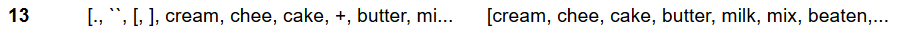

In [186]:
T=translated.head(50000)

In [192]:
frames=[T,df_urlrem, df_new, df_stem, df_lem, df_lower, df_remnum, df_rempunc]

In [190]:
T = T.reset_index(drop=True)

In [193]:
Train=(pd.concat(frames, join='outer', ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False, copy=True, axis=1))

In [196]:
Train=Train.drop(['content_spchar', 'non_emoji_content','content','en_content','Unnamed: 1', 'en_contenturl',
       'url_rem', 'en_contentsw', 'Stopwrod_removed', 'Stopword_removed',
       'en_contentst', 'Stemming', 'Stemmingle', 'lemmatization',
       'lemmatizationtl', 'lower', 'lowerrnum', 'no_num', 'no_numrp'], axis=1)

In [197]:
Train = Train.rename(columns={'no_punc': 'content'})

In [198]:
Train.shape

(10000, 10)

In [210]:
Train=Train.drop(['index'],axis=1)

In [211]:
Train.to_csv("E:\\DMA_PRE\\PREPROCESSED.csv", sep=',',index=False, encoding= 'utf-8')


In [214]:
Train.columns

Index(['u_id', 'm_id', 'forward_count', 'comment_count', 'like_count', 'date',
       'time', 'content_media_count', 'content'],
      dtype='object')

In [212]:
Train

,u_id,m_id,forward_count,comment_count,like_count,date,time,content_media_count,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,0,0,0,2015-02-23,17:41:29,0.0,"[lijiang, tourism, sz002033, stock, stock, fin..."
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,0,0,0,2015-02-14,12:49:58,1.0,"[chen, ling, ding, red, envelop, make, money, ..."
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,0,0,0,2015-03-31,13:58:06,0.0,"[taobao, sucker, industri, ga, fire, send, chi..."
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,0,4,3,2015-06-11,20:39:57,0.0,"[aspect, say, know, everyth, laugh, cri]"
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,0,0,0,2015-03-10,18:02:38,0.0,"[over, zhang]"
5,d80f3d3c5c1d658e82b837a4dd1af849,bfc0819b83ec59ce767287077f2b3507,0,0,0,2015-02-13,01:09:41,1.0,"[lifetim, my, favorit, main, bodi, hook, three..."
6,f349a67d1cd7c8683c5bbc5f8486e193,83674a60e5310195fc35d97ea8f45c46,0,0,0,2015-07-15,01:16:24,1.0,"[on, uniqlo, dress, room, sound, insul, good, ..."
7,24b621c98f2594b698c0b1d60c9ae6db,2cbd3d514ed5ad3dab81aa043c8b3d0a,0,0,0,2015-05-19,10:24:57,0.0,"[so, ordinari, everyday, scene, also, much, lo..."
8,e44d81d630e4f382f657e72aa4b685da,8a88a25f9f26ed9f79080eaacc1a8668,0,1,0,2015-02-11,11:03:36,1.0,"[overh, red, xxiii, tanggua, children, stick, ..."
9,fbe6c953632e1b3dda66cf6118b6ab12,f359a74cb4ac6150a3af8325eda04ea0,0,0,0,2015-03-22,00:54:34,1.0,"[there, good, thing, share, flash, note, note,..."
